## PCA compression of Pluto images from New Horizons.

Some of my experiments with Principal Component Analysis in scikit-learn for compression of Pluto images from the [New Horizons mission](https://www.nasa.gov/mission_pages/newhorizons/main/index.html).

#### PRELIMINARIES - IMPORT LIBRARIES

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage import io, color
from sklearn import decomposition

#### IMPORT AND DISPLAY NASA'S PLUTO IMAGES

These are three of the high resolution images from New Horizons' site:

In [2]:
# Psychedelic:
# http://www.nasa.gov/mission_pages/newhorizons/images/index.html?id=373554
# https://www.nasa.gov/image-feature/psychedelic-pluto

# True Color:
# http://www.nasa.gov/mission_pages/newhorizons/images/index.html?id=367259

# False colors:
# http://www.nasa.gov/mission_pages/newhorizons/images/index.html?id=367260psychedelic pluto

ps = io.imread('nh-psychedelic-pluto_pca.png')
tc = io.imread('global-mosaic-of-pluto-in-true-color.jpg')[60:-60,220:-221,:3]
fc = io.imread('nh-pluto-in-false-color.jpg')[60:-60,220:-221,:3]


We can plot all three:

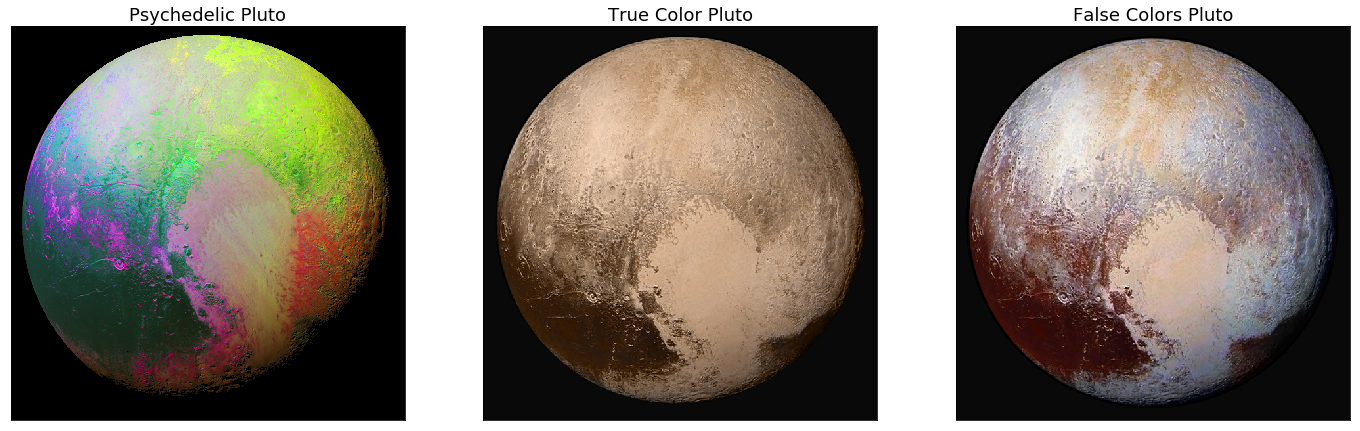

In [3]:
fig = plt.figure(figsize = (24,24))
ax1 = fig.add_subplot(1,3,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Psychedelic Pluto', fontsize=18)
plt.imshow(ps)

ax2 = fig.add_subplot(1,3,2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('True Color Pluto', fontsize=18)
plt.imshow(tc)

ax3 = fig.add_subplot(1,3,3)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('False Colors Pluto', fontsize=18)
plt.imshow(fc)

plt.show()

We can also recolor them in grayscale and using some of the new Matplotlib perceptul colormals:

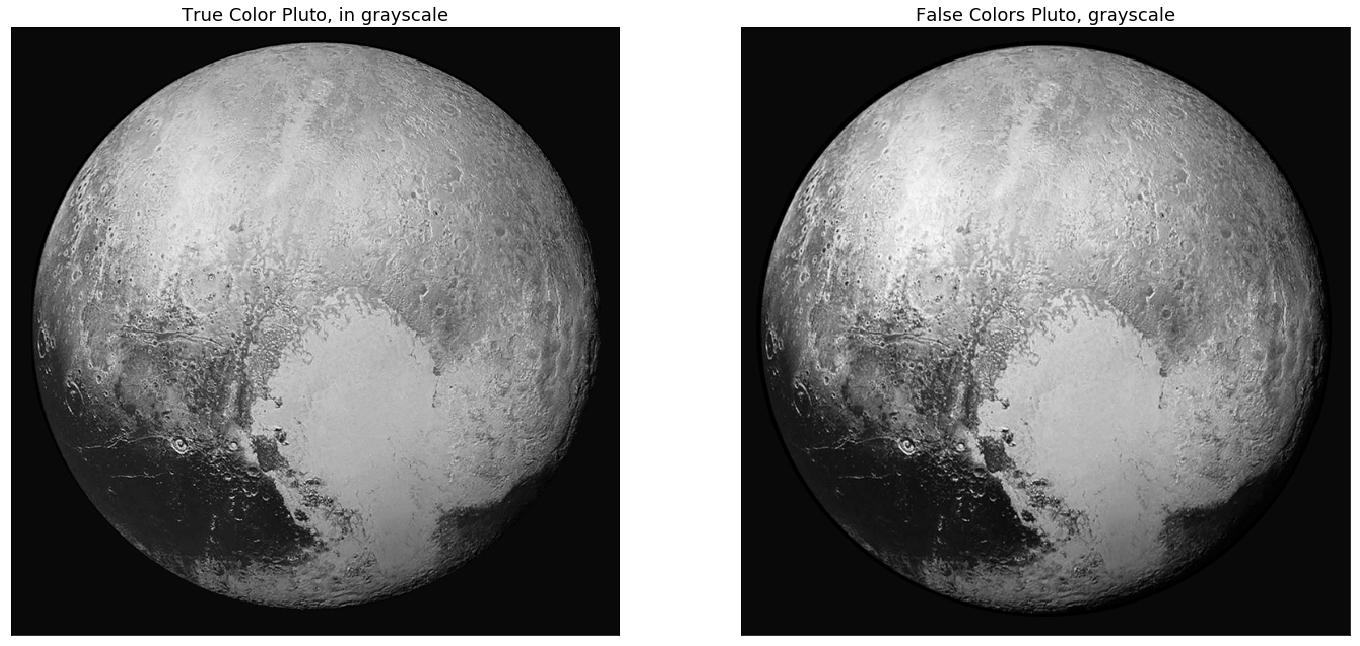

In [4]:
fig = plt.figure(figsize = (24,24))
ax2 = fig.add_subplot(1,2,1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('True Color Pluto, in grayscale', fontsize=18)
plt.imshow(color.rgb2gray(tc), cmap = 'gray')

ax3 = fig.add_subplot(1,2,2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('False Colors Pluto, grayscale', fontsize=18)
plt.imshow(color.rgb2gray(fc), cmap = 'gray')

plt.show()

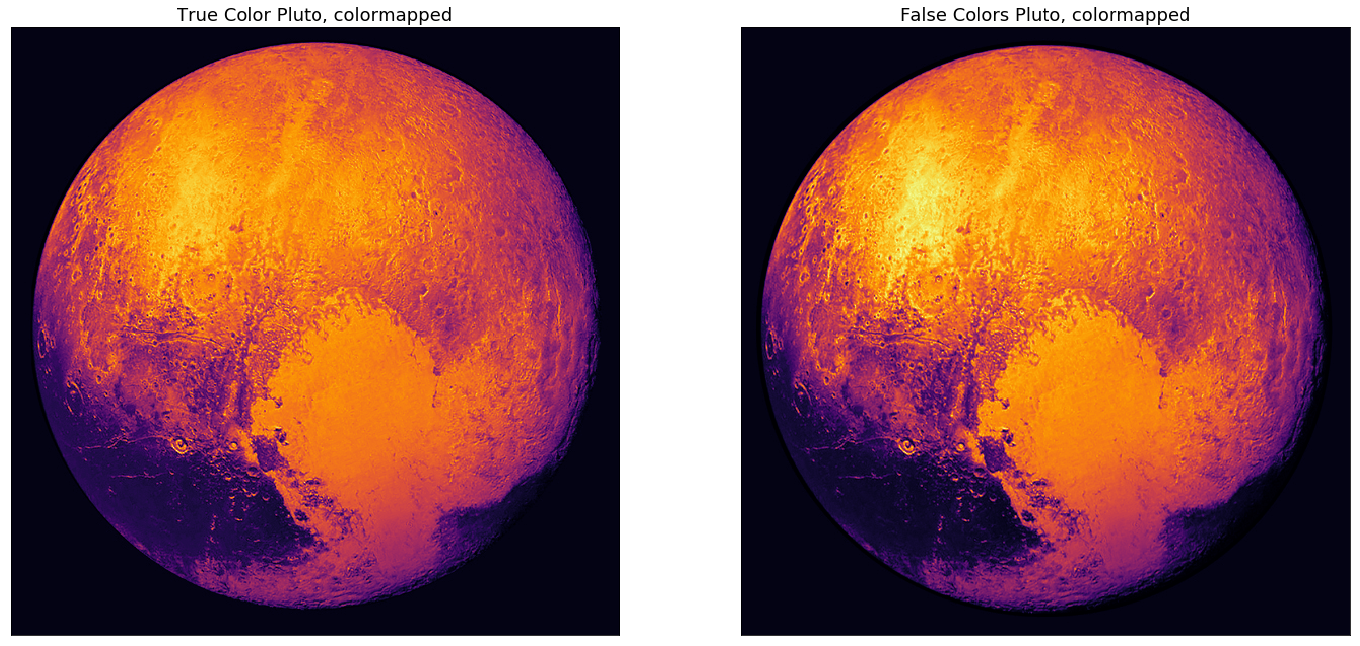

In [5]:
fig = plt.figure(figsize = (24,24))

ax2 = fig.add_subplot(1,2,1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('True Color Pluto, colormapped', fontsize=18)
plt.imshow(color.rgb2gray(tc), cmap = 'inferno')

ax3 = fig.add_subplot(1,2,2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('False Colors Pluto, colormapped', fontsize=18)
plt.imshow(color.rgb2gray(fc), cmap = 'inferno')

plt.show()

I really like the Inferno colormap!!

#### PCA OF THE FALSE COLOR PLUTO IMAGE

First we rearrange data so as to have 3 1D vectors of R, G, B color components:

In [6]:
print fc.shape
vectors = np.reshape(fc,(360000, 3))
print vectors.shape

(600L, 600L, 3L)
(360000L, 3L)


Then we run PCA, and look at the significance of the components:

In [7]:
pca = decomposition.PCA()
pca.fit(vectors)

np.set_printoptions(suppress=True) # so output is not in scientific notation
print "variance ratio: ", pca.explained_variance_ratio_
print "cumulative variance ratio: ", np.cumsum(pca.explained_variance_ratio_)

variance ratio:  [ 0.98672292  0.01198244  0.00129464]
cumulative variance ratio:  [ 0.98672292  0.99870536  1.        ]


##### It looks like the 1st component alone explains almost 99% of the variance.

But first, let's take a look at what is the 'meaning' of the principal components.
We start by printing the weights, also called loadings:

In [8]:
loadings = pca.components_
loadings

array([[ 0.60998698,  0.57215918,  0.54822418],
       [ 0.7292039 , -0.13454213, -0.67093971],
       [ 0.31012506, -0.8090317 ,  0.49928965]])

We can linearly combine the loadings to "make" the components: 

In [9]:
print "Meaning of the 3 components:"
for l in loadings:
    print " + ".join("%.2f * %s" % (value, name)
                     for value, name in zip(l, ['R','G','B']))

Meaning of the 3 components:
0.61 * R + 0.57 * G + 0.55 * B
0.73 * R + -0.13 * G + -0.67 * B
0.31 * R + -0.81 * G + 0.50 * B


#### The linear combinations shown above make it easier to see that in addition the 1st component being very strong (99% of the variance) but also it is described by loadings of that are similar for each of the channels.

We can also make a nice table using Pandas. We create a DataFrame where each column has the loadings for a given component, and each row all the loadings for a specific channel:

In [10]:
variables = ['R', 'G', 'B']
pcs = ['PC1', 'PC2', 'PC3']
ld_df = pd.DataFrame(loadings.T, index=variables, columns=pcs)
ld_df

PC1       PC2       PC3
R  0.609987  0.729204  0.310125
G  0.572159 -0.134542 -0.809032
B  0.548224 -0.670940  0.499290

And, for the sake of visualization, let's get the 1st and 2nd components:

In [11]:
pca.n_components = 2
vectors_reduced = pca.fit_transform(vectors)

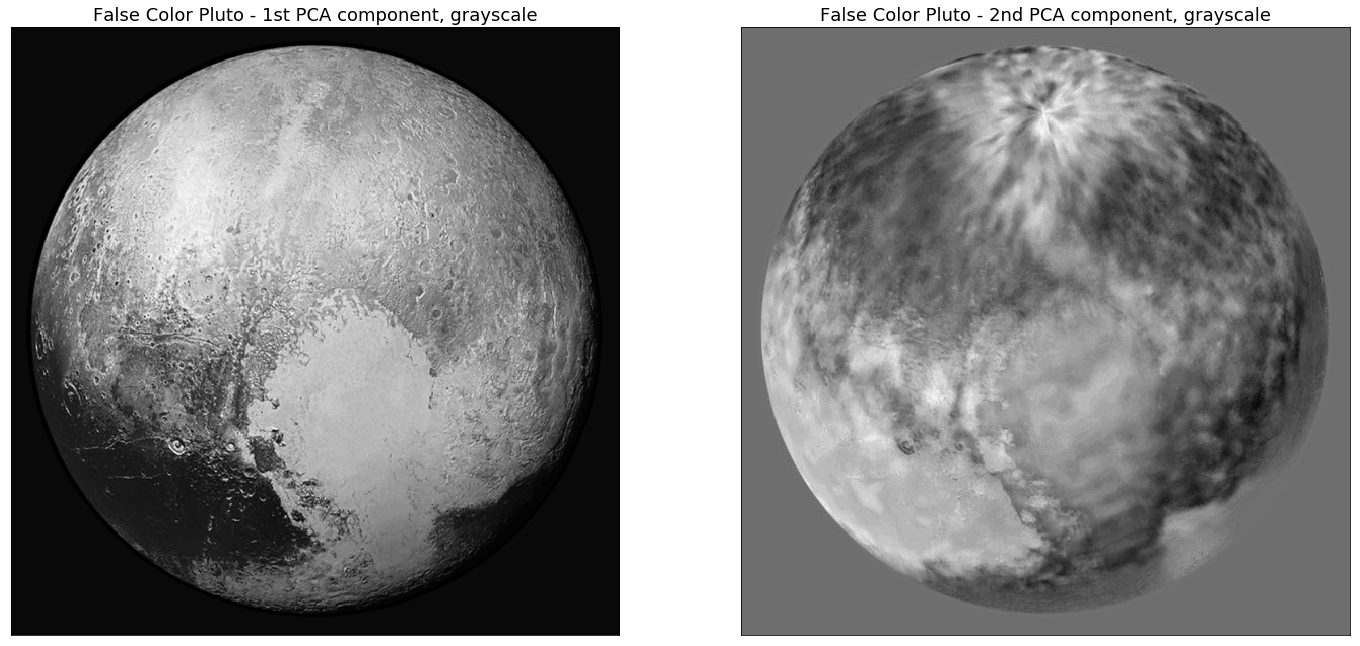

In [12]:
fig = plt.figure(figsize = (24,24))

ax2 = fig.add_subplot(1,2,1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('False Color Pluto - 1st PCA component, grayscale', fontsize=18)
plt.imshow(np.reshape(vectors_reduced[:,0],(600, 600)), cmap = 'gray')

ax3 = fig.add_subplot(1,2,2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('False Color Pluto - 2nd PCA component, grayscale', fontsize=18)
plt.imshow(np.reshape(vectors_reduced[:,1],(600, 600)), cmap = 'gray')

plt.show()


Cool! That second component IS psychedelic...

The first one looks just like the original image. Now we isolate it, and compare side-by-side:

In [13]:
pca.n_components = 1
vectors_reduced = pca.fit_transform(vectors)

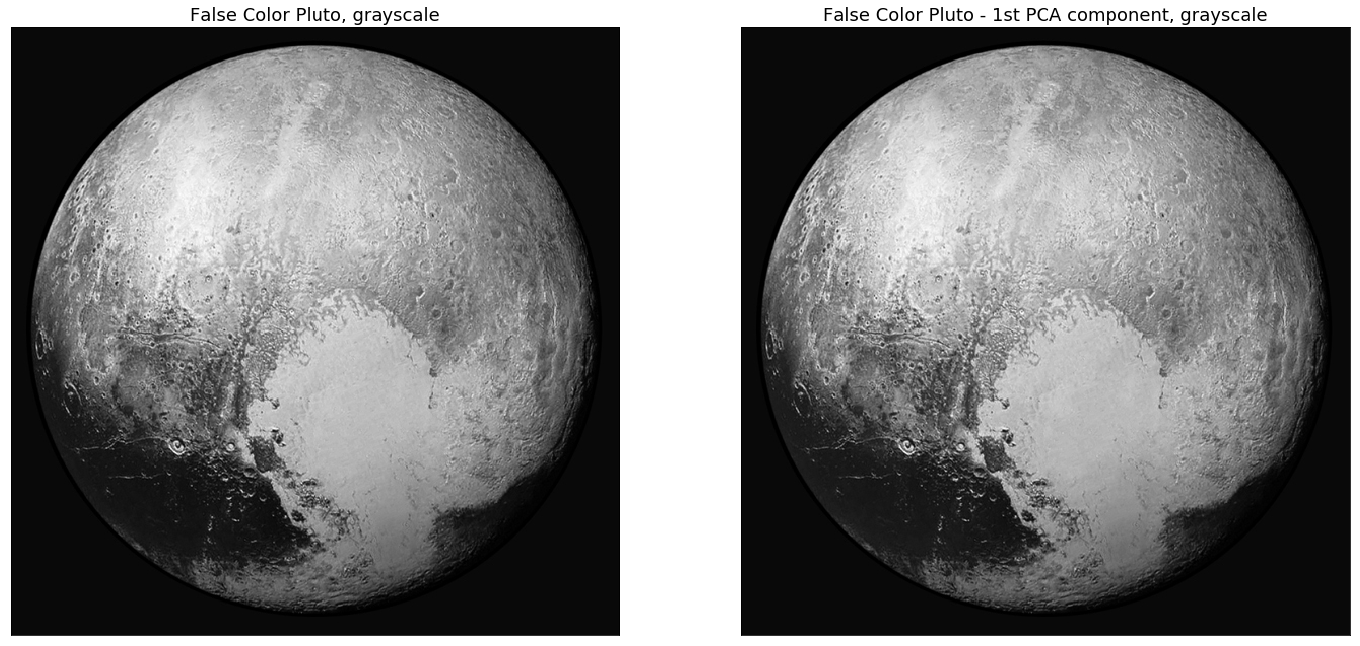

In [14]:
fig = plt.figure(figsize = (24,24))

ax1 = fig.add_subplot(1,2,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('False Color Pluto, grayscale', fontsize=18)
plt.imshow(color.rgb2gray(fc), cmap = 'gray')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('False Color Pluto - 1st PCA component, grayscale', fontsize=18)
plt.imshow(np.reshape(vectors_reduced,(600, 600)), cmap = 'gray')

plt.show()

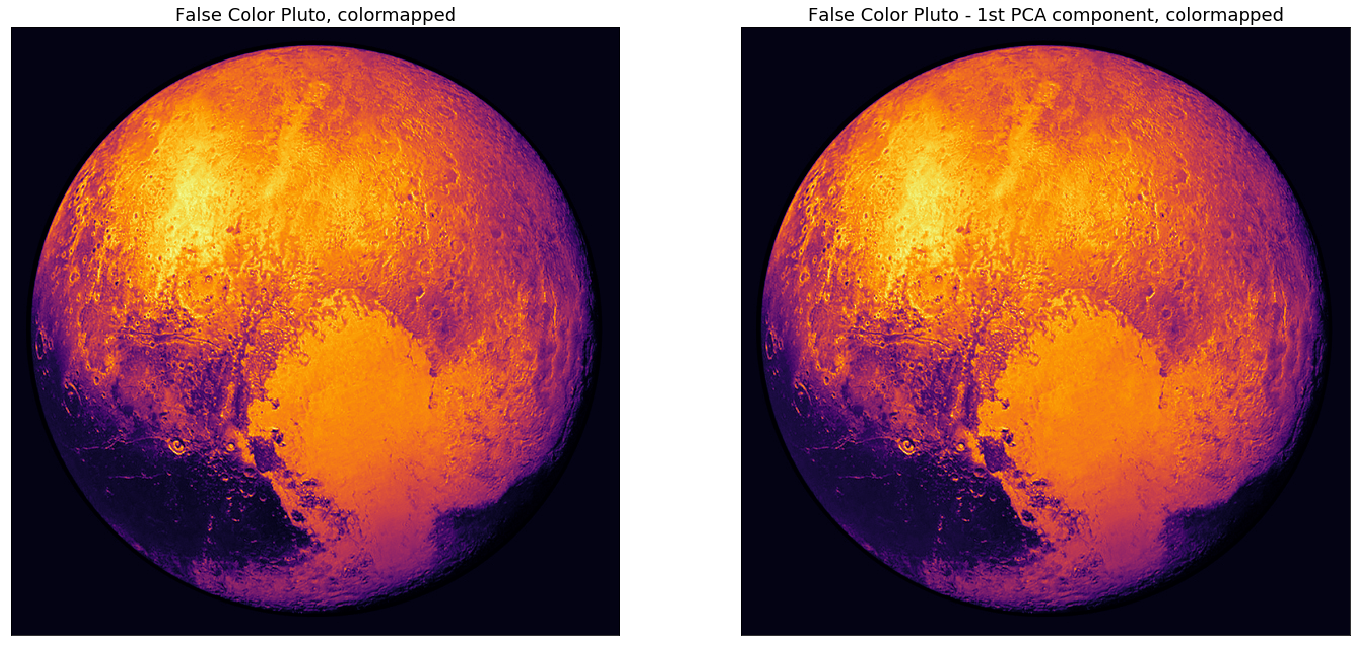

In [15]:
fig = plt.figure(figsize = (24,24))

ax1 = fig.add_subplot(1,2,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('False Color Pluto, colormapped', fontsize=18)
plt.imshow(color.rgb2gray(fc), cmap = 'inferno')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('False Color Pluto - 1st PCA component, colormapped', fontsize=18)
plt.imshow(np.reshape(vectors_reduced,(600, 600)), cmap = 'inferno')

plt.show()

Let's compare the sizes of the arrays:

In [16]:
print fc.size
print vectors_reduced.size

1080000
360000


#### COMMENTS

It looks like principal component of an image is good for compression, as shown by the comparison above. 
There are of course better ways of compressing images, but this was a fun way to play around with PCA.